In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('google.csv')

In [3]:
# Remove commas from the 'Close' column
df['Close'] = df['Close'].str.replace(',', '')

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))

In [5]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [6]:
train_size

1006

In [7]:
train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,0.237573,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,0.241514,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,0.228781,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,0.216419,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,0.178548,"11,688,800"
...,...,...,...,...,...,...
1001,12/24/2015,749.55,751.35,746.62,0.354451,"527,200"
1002,12/28/2015,752.92,762.99,749.52,0.373896,"1,515,300"
1003,12/29/2015,766.69,779.98,766.43,0.393313,"1,765,000"
1004,12/30/2015,776.60,777.60,766.90,0.385596,"1,293,300"


In [8]:
test_data

,Date,Open,High,Low,Close,Volume
1006,1/4/2016,743.00,744.06,731.26,0.345410,"3,272,800"
1007,1/5/2016,746.45,752.00,738.64,0.346430,"1,950,700"
1008,1/6/2016,730.00,747.18,728.92,0.347863,"1,947,000"
1009,1/7/2016,730.31,738.50,719.06,0.324118,"2,963,700"
1010,1/8/2016,731.45,733.23,713.00,0.307691,"2,450,900"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,0.411656,"623,400"
1254,12/27/2016,790.68,797.86,787.66,0.413916,"789,100"
1255,12/28/2016,793.70,794.23,783.20,0.404958,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,0.401844,"744,300"


In [9]:
def creat_seq(data,time=6):
    x=[]
    y=[]
    for i in range(len(data)-time):
        x.append(data[i:i+time,0])
        y.append(data[i+time,0])
    return np.array(x),np.array(y)

In [10]:
x_train, y_train = creat_seq(train_data['Close'].values.reshape(-1, 1))

In [11]:
xtest,ytest=creat_seq(test_data['Close'].values.reshape(-1,1))

In [12]:
model=Sequential()

In [13]:
from tensorflow.keras.layers import Dense, LSTM
model.add(LSTM(units=50, return_sequences=True ,input_shape=(6,1)))

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.add(LSTM(units=50))

In [15]:
model.add(Dense(units=1))

In [16]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0624
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022
Epoc

In [19]:
# Evaluate the model
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(xtest, ytest, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

Train Loss: 0.0009613773436285555
Test Loss: 0.0002422118268441409


In [23]:
# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(xtest)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [21]:
# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


TypeError: unhashable type: 'numpy.ndarray'

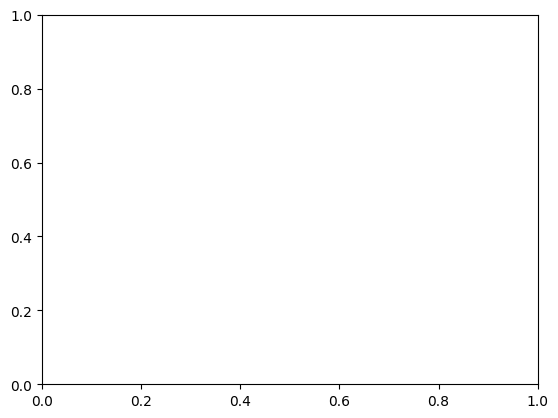

In [24]:
##visualize the prediction and real price
plt.plot(test_data, color = 'red', label = 'Real price')
plt.plot(test_predictions,color='blue',label='Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()